Get scholia data - schizophrenia - clinical trials via sparql request

In [1]:
import SPARQLWrapper

sparql = SPARQLWrapper.SPARQLWrapper("https://query.wikidata.org/sparql")

query = '''
PREFIX target: <http://www.wikidata.org/entity/Q41112>

SELECT
  DISTINCT
  ?start_date
  ?trial ?trialLabel
  ?intervention ?interventionLabel
  ?sponsor ?sponsorLabel
WHERE {
  ?trial wdt:P31 wd:Q30612 ;
  wdt:P1050 / wdt:P279* target: .
  OPTIONAL {
    ?trial wdt:P580 ?starttime
    BIND(SUBSTR(STR(?starttime), 0, 11) AS ?start_date)
  }
  OPTIONAL { ?trial wdt:P4844 ?intervention }
  OPTIONAL { ?trial wdt:P859 ?sponsor }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en,da,de,es,fr,jp,nl,no,pl,ru,sv,zh". }
}
ORDER BY DESC(?starttime)
'''

# Set the query language to SPARQL
sparql.setQuery(query)

# Set the return format to JSON
sparql.setReturnFormat(SPARQLWrapper.JSON)

# Execute the query and store the results
results = sparql.query().convert()

# Print the results
# print(results)

# print(results['results']['bindings'])


for trial in results['results']['bindings']:
    for key, value in trial.items():
        print(key)
        print(value['value'])

start_date
2022-12-01
trial
http://www.wikidata.org/entity/Q113914424
trialLabel
fMRI-based Neurofeedback to Relieve Drug-resistant Auditory Hallucinations
start_date
2022-10-01
trial
http://www.wikidata.org/entity/Q113932415
trialLabel
Exercise-based Program for Rehabilitation of Veterans With Severe Mental Illness
start_date
2022-09-15
trial
http://www.wikidata.org/entity/Q113927226
trialLabel
D-serine AudRem: R33 Phase
start_date
2022-09-01
trial
http://www.wikidata.org/entity/Q113941830
trialLabel
EEG and Behavioral Correlates of Temporal Prediction in the Tactile Modality in Schizophrenia
start_date
2022-08-01
trial
http://www.wikidata.org/entity/Q113943405
trialLabel
Individualized Repetitive Transcranial Magnetic Stimulation for Auditory Verbal Hallucinations
start_date
2022-08-01
trial
http://www.wikidata.org/entity/Q113944797
trialLabel
Intervention Effect of Shen-based Qigong Exercise on Residual Symptoms of Schizophrenia
start_date
2022-06-30
trial
http://www.wikidata.org/en

In [7]:
import pandas as pd

dict_trials = {}

trials = []
result_list = results['results']['bindings']
for res in result_list:
    for res_key, res_value in res.items():
        if res_key == 'trial':
            uri = res_value['value']
            splitted_uri = uri.split('/')
            entity_id = splitted_uri[-1]
            trials.append(entity_id)
            dict_trials[entity_id] = res


trial_df = pd.DataFrame.from_dict(dict_trials)
trial_df = trial_df.transpose()

print(trial_df.columns)

Index(['start_date', 'trial', 'trialLabel', 'intervention',
       'interventionLabel', 'sponsor', 'sponsorLabel'],
      dtype='object')


In [14]:
start_dates = []

for index, row in trial_df.iterrows():
    start_date = row['start_date']
    if isinstance(start_date, dict) :
        value = start_date['value']
        start_dates.append(value)

years = []
for date in start_dates:
    year = date[0:4]
    years.append(year)


# create a dictionary to count the occurrences of each year
year_counts = {}
for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# create the list of tuples from the dictionary
year_counts_list = [(year, year_counts[year]) for year in year_counts]

print(year_counts_list)


[('2022', 31), ('2021', 62), ('2020', 103), ('2019', 165), ('2018', 144), ('2017', 128), ('2016', 138), ('2015', 124), ('2014', 153), ('2013', 136), ('2012', 145), ('2011', 150), ('2010', 142), ('2009', 145), ('2008', 177), ('2007', 154), ('2006', 139), ('2005', 136), ('2004', 136), ('2003', 92), ('2002', 55), ('2001', 47), ('2000', 27), ('1999', 10), ('1998', 14), ('1997', 5), ('1996', 4), ('1995', 1), ('1994', 1), ('1993', 1), ('1992', 1), ('1991', 1), ('1989', 2), ('1984', 1), ('1983', 1)]


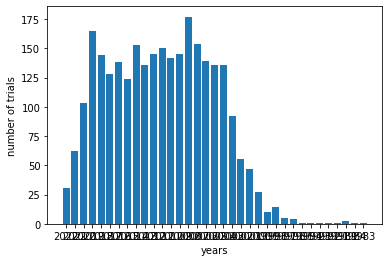

In [18]:
import matplotlib.pyplot as plt

# group the data by year
data_by_year = {}
for year, value in year_counts_list:
    if year in data_by_year:
        data_by_year[year].append(value)
    else:
        data_by_year[year] = [value]

# get the years and the values
years = list(data_by_year.keys())
values = [sum(data_by_year[year]) for year in years]

# create the bar plot
plt.bar(years, values)
plt.ylabel('number of trials')
plt.xlabel('years')
plt.show()
